# Environment Sanity Check
Use GPU
Runtime > Change runtime type > GPU

In [1]:
!nvidia-smi

Fri Feb 16 15:09:10 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   55C    P8              11W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

#Setup


In [3]:
!git clone https://github.com/rapidsai/rapidsai-csp-utils.git
!python rapidsai-csp-utils/colab/pip-install.py


Cloning into 'rapidsai-csp-utils'...
remote: Enumerating objects: 460, done.
remote: Counting objects: 100% (191/191), done.
remote: Compressing objects: 100% (100/100), done.
remote: Total 460 (delta 131), reused 124 (delta 91), pack-reused 269
Receiving objects: 100% (460/460), 126.19 KiB | 1.25 MiB/s, done.
Resolving deltas: 100% (233/233), done.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.1/53.1 kB 1.4 MB/s eta 0:00:00
***********************************************************************
Woo! Your instance has a Tesla T4 GPU!
We will install the latest stable RAPIDS via pip 24.2.*!  Please stand by, should be quick...
***********************************************************************

Looking in indexes: https://pypi.org/simple, https://pypi.nvidia.com
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 464.7/464.7 MB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 GB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 GB 1.2 

# Connect to the drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Location of the data

In [4]:
import os

In [5]:
embeddings_path = '/content/drive/MyDrive/EOST/PdR : Self-supervised learning on DRV/Embeddings/'

In [6]:
embeddings_filename = 'embedding_29.npy'
index_filename = 'filenames_29.npy'

In [7]:
name = 'LF'

In [8]:
os.listdir(os.path.join(embeddings_path, name))

['embedding_29.npy', 'filenames_29.npy', 'tsne.npy']

In [9]:
out_path = embeddings_path

# Generic modules

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Clustering

## Clustering modules

In [11]:
import cudf
import cuml
import cugraph
import cuspatial
import cuxfilter

## Test data

In [13]:
embeddings = np.load(os.path.join(embeddings_path, name, embeddings_filename))
filenames = np.load(os.path.join(embeddings_path, name, index_filename))

In [14]:
embeddings.shape, filenames.shape

((185090, 512), (185090,))

## Creating colormap

In [15]:
from datetime import datetime

In [16]:
datetimes = [datetime.strptime(date_str, f"%Y_%m_%d_%H_%M_%S_{name}.png") for date_str in filenames]

In [17]:
c = [d.timetuple().tm_yday for d in datetimes]

## t-SNE

https://docs.rapids.ai/api/cuml/stable/api/#dimensionality-reduction-and-manifold-learning

https://www.kaggle.com/code/carlmcbrideellis/jane-street-t-sne-using-rapids-cuml

https://distill.pub/2016/misread-tsne/

In [ ]:
tsne = cuml.TSNE(n_components=2, perplexity=40, learning_rate=500, n_iter=2000)
tsne_2D = tsne.fit_transform(embeddings)

/usr/local/lib/python3.10/dist-packages/cuml/internals/api_decorators.py:344: UserWarning: Starting from version 22.04, the default method of TSNE is 'fft'.
  return func(**kwargs)


[W] [20:01:56.093605] # of Nearest Neighbors should be at least 3 * perplexity. Your results might be a bit strange...


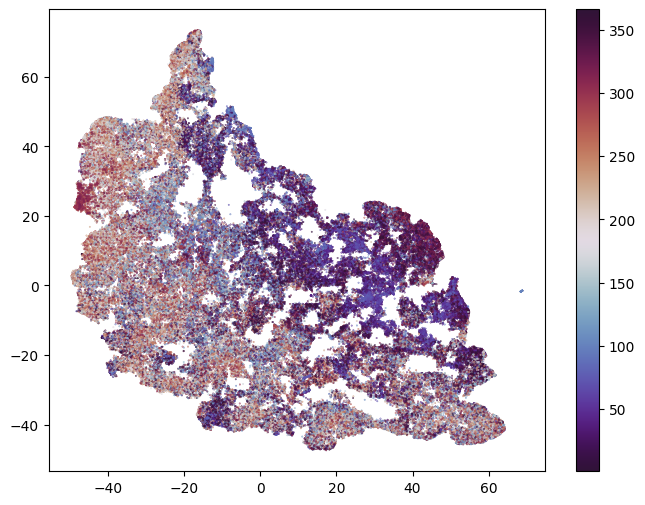

In [ ]:
x, y = tsne_2D[:, 0], tsne_2D[:, 1]
fig, ax = plt.subplots(figsize=(8, 6))
sc = ax.scatter(x, y, c=c, s=.1, cmap='twilight_shifted')
plt.colorbar(sc)

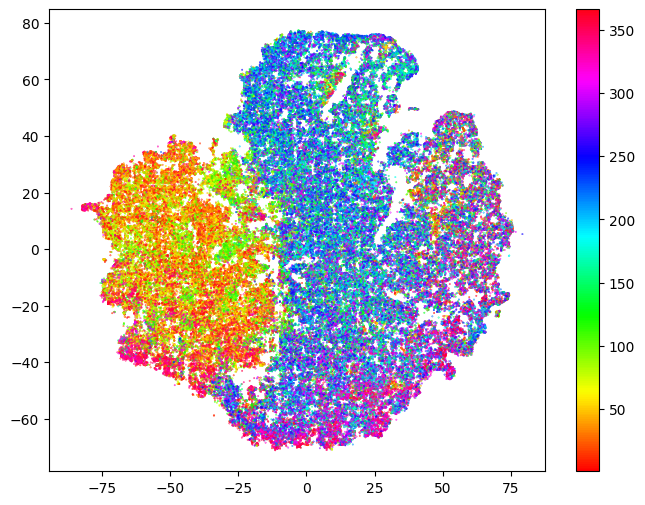

In [ ]:
x, y = tsne_2D[:, 0], tsne_2D[:, 1]
fig, ax = plt.subplots(figsize=(8, 6))
sc = ax.scatter(x, y, c=c, s=.1, cmap='hsv')
plt.colorbar(sc)

In [ ]:
tsne_2D.shape

(185090, 2)

BP
[W] [15:44:59.581666] Perplexity should be within ranges (5, 50). Your results might be a bit strange...
[W] [15:44:59.583553] # of Nearest Neighbors should be at least 3 * perplexity. Your results might be a bit strange...
HF
[W] [15:49:00.489846] Perplexity should be within ranges (5, 50). Your results might be a bit strange...
[W] [15:49:00.489997] # of Nearest Neighbors should be at least 3 * perplexity. Your results might be a bit strange...
MF
[W] [15:53:06.740020] Perplexity should be within ranges (5, 50). Your results might be a bit strange...
[W] [15:53:06.740145] # of Nearest Neighbors should be at least 3 * perplexity. Your results might be a bit strange...
LF
[W] [15:57:03.391054] Perplexity should be within ranges (5, 50). Your results might be a bit strange...
[W] [15:57:03.391171] # of Nearest Neighbors should be at least 3 * perplexity. Your results might be a bit strange...
WF
[W] [16:01:11.777614] Perplexity should be within ranges (5, 50). Your results might be a

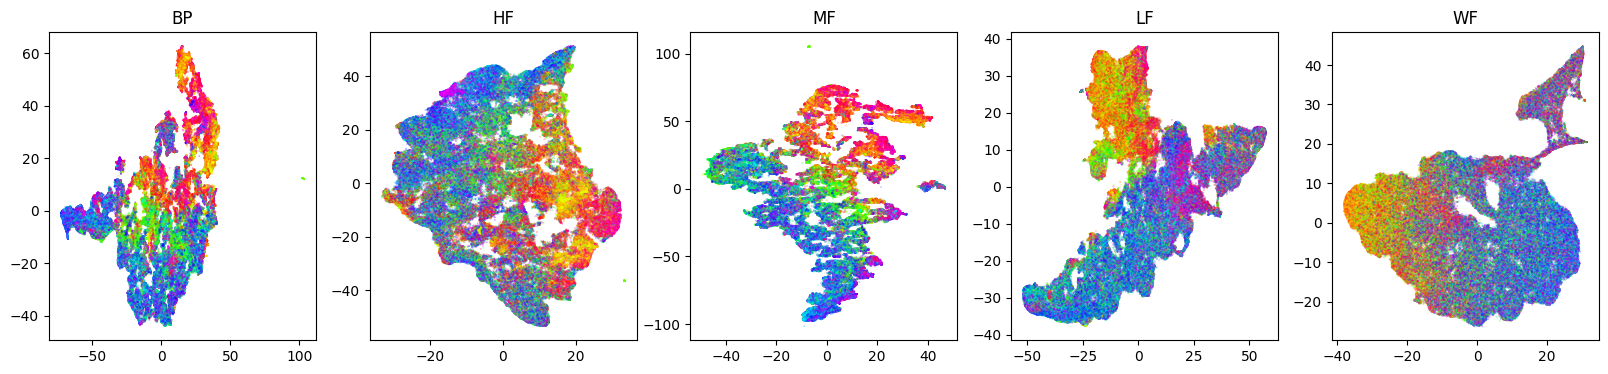

In [18]:
names = ['BP', 'HF', 'MF', 'LF', 'WF']
k = 1
plt.figure(figsize=(20, 4))

for name in names:
  print(name)
  embeddings = np.load(os.path.join(embeddings_path, name, embeddings_filename))
  tsne = cuml.TSNE(n_components=2, perplexity=80, learning_rate=400, n_iter=40000, n_neighbors=200, early_exaggeration=1000, late_exaggeration=1.8)
  tsne_2D = tsne.fit_transform(embeddings)
  np.save(os.path.join(out_path, name, 'tsne_exagerated.npy'), tsne_2D)

  plt.subplot(1, len(names), k)
  x, y = tsne_2D[:, 0], tsne_2D[:, 1]
  plt.scatter(x, y, c=c, s=.02, cmap='hsv')
  plt.title(name)
  k += 1

In [ ]:
names = ['BP', 'HF', 'MF', 'LF', 'WF']
k = 1
plt.figure(figsize=(20, 4))

for name in names:
  print(name)
  embeddings = np.load(os.path.join(embeddings_path, name, embeddings_filename))
  tsne = cuml.TSNE(n_components=2, perplexity=80, learning_rate=400, n_iter=40000, n_neighbors=200, early_exaggeration=1000, late_exaggeration=1.8)
  tsne_2D = tsne.fit_transform(embeddings)
  np.save(os.path.join(out_path, name, 'tsne_cloud.npy'), tsne_2D)

  plt.subplot(1, len(names), k)
  x, y = tsne_2D[:, 0], tsne_2D[:, 1]
  plt.scatter(x, y, c=c, s=.02, cmap='hsv')
  plt.title(name)
  k += 1

BP
[W] [16:05:38.354643] Perplexity should be within ranges (5, 50). Your results might be a bit strange...
[W] [16:05:38.354769] # of Nearest Neighbors should be at least 3 * perplexity. Your results might be a bit strange...
HF


In [ ]:
names = ['BP', 'HF', 'MF', 'LF', 'WF']
k = 1
plt.figure(figsize=(20, 4))

for name in names:
  print(name)
  embeddings = np.load(os.path.join(embeddings_path, name, embeddings_filename))
  tsne = cuml.TSNE(n_components=2, perplexity=50, learning_rate=400, n_iter=40000, n_neighbors=200, early_exaggeration=1000, late_exaggeration=1)
  tsne_2D = tsne.fit_transform(embeddings)

  plt.subplot(1, len(names), k)
  x, y = tsne_2D[:, 0], tsne_2D[:, 1]
  plt.scatter(x, y, c=c, s=.02, cmap='twilight_shifted')
  plt.title(name)
  k += 1

BP
[W] [23:57:33.083927] Perplexity should be within ranges (5, 50). Your results might be a bit strange...
[W] [23:57:33.085435] # of Nearest Neighbors should be at least 3 * perplexity. Your results might be a bit strange...
HF
[W] [00:01:25.781400] Perplexity should be within ranges (5, 50). Your results might be a bit strange...
[W] [00:01:25.781519] # of Nearest Neighbors should be at least 3 * perplexity. Your results might be a bit strange...
MF
[W] [00:05:29.892760] Perplexity should be within ranges (5, 50). Your results might be a bit strange...
[W] [00:05:29.893803] # of Nearest Neighbors should be at least 3 * perplexity. Your results might be a bit strange...
LF


### LF

In [ ]:
name = 'LF'
embeddings = np.load(os.path.join(embeddings_path, name, embeddings_filename))
args = {'n_components' : 2, 'perplexity': 50, 'learning_rate': 400, 'early_exaggeration': 10, 'n_iter': 1000, 'n_neighbors': 200}
param1 = 'perplexity'
params1 = [5, 10, 30, 50] # perplexity
param2 = 'early_exaggeration'
params2 = [1, 10, 100, 1000] # early exageration
args.pop(param1)
args.pop(param2)

fig, axs = plt.subplots(len(params1), len(params2), figsize=(16, 16))
fig.suptitle(', '.join([f'{name}={args[name]}' for name in args]))

for i, p1 in enumerate(params1):
  for j, p2 in enumerate(params2):
    args[param1] = p1
    args[param2] = p2
    print(i, j, ', '.join([f'{name}={args[name]}' for name in args]))
    tsne = cuml.TSNE(**args)
    tsne_2D = tsne.fit_transform(embeddings)
    #np.save(os.path.join(out_path, name, 'tsne.npy'), tsne_2D)
    x, y = tsne_2D[:, 0], tsne_2D[:, 1]

    ax = axs[i, j]
    ax.scatter(x, y, c=c, s=.02, cmap='hsv')
    ax.set_title(f"{param1}={p1}, {param2}={p2}")

fig.tight_layout()

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
name = 'LF'
embeddings = np.load(os.path.join(embeddings_path, name, embeddings_filename))
args = {'n_components' : 2, 'perplexity': 50, 'learning_rate': 400, 'early_exaggeration': 10, 'n_iter': 1000, 'n_neighbors': 200, 'late_exaggeration': 1}
param1 = 'early_exaggeration'
params1 = [1, 10, 100, 1000]
param2 = 'late_exaggeration'
params2 = [1, 2, 5, 10]
args.pop(param1)
args.pop(param2)

fig, axs = plt.subplots(len(params1), len(params2), figsize=(16, 16))
fig.suptitle(', '.join([f'{name}={args[name]}' for name in args]))

for i, p1 in enumerate(params1):
  for j, p2 in enumerate(params2):
    args[param1] = p1
    args[param2] = p2
    print(i, j, ', '.join([f'{name}={args[name]}' for name in args]))
    tsne = cuml.TSNE(**args)
    tsne_2D = tsne.fit_transform(embeddings)
    #np.save(os.path.join(out_path, name, 'tsne.npy'), tsne_2D)
    x, y = tsne_2D[:, 0], tsne_2D[:, 1]

    ax = axs[i, j]
    ax.scatter(x, y, c=c, s=.02, cmap='hsv')
    ax.set_title(f"{param1}={p1}, {param2}={p2}")

fig.tight_layout()

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
name = 'LF'
embeddings = np.load(os.path.join(embeddings_path, name, embeddings_filename))
args = {'n_components' : 2, 'perplexity': 50, 'learning_rate': 400, 'early_exaggeration': 10, 'n_iter': 1000, 'n_neighbors': 200, 'late_exaggeration': 1}
param1 = 'perplexity'
params1 = [5, 10, 30, 50]
param2 = 'learning_rate'
params2 = [10, 100, 500, 1000]
args.pop(param1)
args.pop(param2)

fig, axs = plt.subplots(len(params1), len(params2), figsize=(16, 16))
fig.suptitle(', '.join([f'{name}={args[name]}' for name in args]))

for i, p1 in enumerate(params1):
  for j, p2 in enumerate(params2):
    args[param1] = p1
    args[param2] = p2
    print(i, j, ', '.join([f'{name}={args[name]}' for name in args]))
    tsne = cuml.TSNE(**args)
    tsne_2D = tsne.fit_transform(embeddings)
    #np.save(os.path.join(out_path, name, 'tsne.npy'), tsne_2D)
    x, y = tsne_2D[:, 0], tsne_2D[:, 1]

    ax = axs[i, j]
    ax.scatter(x, y, c=c, s=.02, cmap='hsv')
    ax.set_title(f"{param1}={p1}, {param2}={p2}")

fig.tight_layout()

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
name = 'LF'
embeddings = np.load(os.path.join(embeddings_path, name, embeddings_filename))
args = {'n_components' : 2, 'perplexity': 50, 'learning_rate': 400, 'early_exaggeration': 10, 'n_iter': 1000, 'n_neighbors': 200, 'late_exaggeration': 1}
param1 = 'perplexity'
params1 = [5, 10, 30, 50]
param2 = 'n_neighbors'
params2 = [15, 30, 90, 150]
args.pop(param1)
args.pop(param2)

fig, axs = plt.subplots(len(params1), len(params2), figsize=(16, 16))
fig.suptitle(', '.join([f'{name}={args[name]}' for name in args]))

for i, p1 in enumerate(params1):
  for j, p2 in enumerate(params2):
    args[param1] = p1
    args[param2] = p2
    print(i, j, ', '.join([f'{name}={args[name]}' for name in args]))
    tsne = cuml.TSNE(**args)
    tsne_2D = tsne.fit_transform(embeddings)
    #np.save(os.path.join(out_path, name, 'tsne.npy'), tsne_2D)
    x, y = tsne_2D[:, 0], tsne_2D[:, 1]

    ax = axs[i, j]
    ax.scatter(x, y, c=c, s=.02, cmap='hsv')
    ax.set_title(f"{param1}={p1}, {param2}={p2}")

fig.tight_layout()

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
name = 'LF'
embeddings = np.load(os.path.join(embeddings_path, name, embeddings_filename))
args = {'n_components' : 2, 'perplexity': 50, 'learning_rate': 400, 'early_exaggeration': 20, 'n_iter': 1000, 'n_neighbors': 200, 'late_exaggeration': 1.5}
param1 = 'perplexity'
params1 = [25, 50, 75, 100]
param2 = 'n_iter'
params2 = [250, 1000, 5000, 10000]
args.pop(param1)
args.pop(param2)

fig, axs = plt.subplots(len(params1), len(params2), figsize=(16, 16))
fig.suptitle(', '.join([f'{name}={args[name]}' for name in args]))

for i, p1 in enumerate(params1):
  for j, p2 in enumerate(params2):
    args[param1] = p1
    args[param2] = p2
    print(i, j, ', '.join([f'{name}={args[name]}' for name in args]))
    tsne = cuml.TSNE(**args)
    tsne_2D = tsne.fit_transform(embeddings)
    #np.save(os.path.join(out_path, name, 'tsne.npy'), tsne_2D)
    x, y = tsne_2D[:, 0], tsne_2D[:, 1]

    ax = axs[i, j]
    ax.scatter(x, y, c=c, s=.02, cmap='hsv')
    ax.set_title(f"{param1}={p1}, {param2}={p2}")

fig.tight_layout()

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
name = 'LF'
embeddings = np.load(os.path.join(embeddings_path, name, embeddings_filename))
args = {'n_components' : 2, 'perplexity': 80, 'learning_rate': 400, 'early_exaggeration': 20, 'n_iter': 5000, 'n_neighbors': 200, 'late_exaggeration': 1.5}
param1 = 'n_iter'
params1 = [4000, 8000, 12000, 16000]
param2 = 'late_exaggeration'
params2 = [1, 1.2, 1.4, 1.6]
args.pop(param1)
args.pop(param2)

fig, axs = plt.subplots(len(params1), len(params2), figsize=(16, 16))
fig.suptitle(', '.join([f'{name}={args[name]}' for name in args]))

for i, p1 in enumerate(params1):
  for j, p2 in enumerate(params2):
    args[param1] = p1
    args[param2] = p2
    print(i, j, ', '.join([f'{name}={args[name]}' for name in args]))
    tsne = cuml.TSNE(**args)
    tsne_2D = tsne.fit_transform(embeddings)
    #np.save(os.path.join(out_path, name, 'tsne.npy'), tsne_2D)
    x, y = tsne_2D[:, 0], tsne_2D[:, 1]

    ax = axs[i, j]
    ax.scatter(x, y, c=c, s=.02, cmap='hsv')
    ax.set_title(f"{param1}={p1}, {param2}={p2}")

fig.tight_layout()

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
name = 'LF'
embeddings = np.load(os.path.join(embeddings_path, name, embeddings_filename))
args = {'n_components' : 2, 'perplexity': 100, 'learning_rate': 400, 'early_exaggeration': 20, 'n_iter': 5000, 'n_neighbors': 200, 'late_exaggeration': 1.5}
param1 = 'n_iter'
params1 = [10000, 20000, 30000, 40000]
param2 = 'late_exaggeration'
params2 = [1.4, 1.6, 1.8, 2]
args.pop(param1)
args.pop(param2)

fig, axs = plt.subplots(len(params1), len(params2), figsize=(16, 16))
fig.suptitle(', '.join([f'{name}={args[name]}' for name in args]))

for i, p1 in enumerate(params1):
  for j, p2 in enumerate(params2):
    args[param1] = p1
    args[param2] = p2
    print(i, j, ', '.join([f'{name}={args[name]}' for name in args]))
    tsne = cuml.TSNE(**args)
    tsne_2D = tsne.fit_transform(embeddings)
    #np.save(os.path.join(out_path, name, 'tsne.npy'), tsne_2D)
    x, y = tsne_2D[:, 0], tsne_2D[:, 1]

    ax = axs[i, j]
    ax.scatter(x, y, c=c, s=.02, cmap='hsv')
    ax.set_title(f"{param1}={p1}, {param2}={p2}")

fig.tight_layout()

Output hidden; open in https://colab.research.google.com to view.

### MF

In [ ]:
name = 'MF'
embeddings = np.load(os.path.join(embeddings_path, name, embeddings_filename))
args = {'n_components' : 2, 'perplexity': 50, 'learning_rate': 400, 'early_exaggeration': 10, 'n_iter': 1000, 'n_neighbors': 200}
param1 = 'perplexity'
params1 = [5, 10, 30, 50] # perplexity
param2 = 'early_exaggeration'
params2 = [1, 10, 100, 1000] # early exageration
args.pop(param1)
args.pop(param2)

fig, axs = plt.subplots(len(params1), len(params2), figsize=(16, 16))
fig.suptitle(', '.join([f'{name}={args[name]}' for name in args]))

for i, p1 in enumerate(params1):
  for j, p2 in enumerate(params2):
    args[param1] = p1
    args[param2] = p2
    print(i, j, ', '.join([f'{name}={args[name]}' for name in args]))
    tsne = cuml.TSNE(**args)
    tsne_2D = tsne.fit_transform(embeddings)
    #np.save(os.path.join(out_path, name, 'tsne.npy'), tsne_2D)
    x, y = tsne_2D[:, 0], tsne_2D[:, 1]

    ax = axs[i, j]
    ax.scatter(x, y, c=c, s=.02, cmap='hsv')
    ax.set_title(f"{param1}={p1}, {param2}={p2}")

fig.tight_layout()

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
name = 'MF'
embeddings = np.load(os.path.join(embeddings_path, name, embeddings_filename))
args = {'n_components' : 2, 'perplexity': 50, 'learning_rate': 400, 'early_exaggeration': 10, 'n_iter': 1000, 'n_neighbors': 200, 'late_exaggeration': 1}
param1 = 'early_exaggeration'
params1 = [1, 10, 100, 1000]
param2 = 'late_exaggeration'
params2 = [1, 2, 5, 10]
args.pop(param1)
args.pop(param2)

fig, axs = plt.subplots(len(params1), len(params2), figsize=(16, 16))
fig.suptitle(', '.join([f'{name}={args[name]}' for name in args]))

for i, p1 in enumerate(params1):
  for j, p2 in enumerate(params2):
    args[param1] = p1
    args[param2] = p2
    print(i, j, ', '.join([f'{name}={args[name]}' for name in args]))
    tsne = cuml.TSNE(**args)
    tsne_2D = tsne.fit_transform(embeddings)
    #np.save(os.path.join(out_path, name, 'tsne.npy'), tsne_2D)
    x, y = tsne_2D[:, 0], tsne_2D[:, 1]

    ax = axs[i, j]
    ax.scatter(x, y, c=c, s=.02, cmap='hsv')
    ax.set_title(f"{param1}={p1}, {param2}={p2}")

fig.tight_layout()

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
name = 'MF'
embeddings = np.load(os.path.join(embeddings_path, name, embeddings_filename))
args = {'n_components' : 2, 'perplexity': 50, 'learning_rate': 400, 'early_exaggeration': 10, 'n_iter': 1000, 'n_neighbors': 200, 'late_exaggeration': 1}
param1 = 'perplexity'
params1 = [5, 10, 30, 50]
param2 = 'learning_rate'
params2 = [10, 100, 500, 1000]
args.pop(param1)
args.pop(param2)

fig, axs = plt.subplots(len(params1), len(params2), figsize=(16, 16))
fig.suptitle(', '.join([f'{name}={args[name]}' for name in args]))

for i, p1 in enumerate(params1):
  for j, p2 in enumerate(params2):
    args[param1] = p1
    args[param2] = p2
    print(i, j, ', '.join([f'{name}={args[name]}' for name in args]))
    tsne = cuml.TSNE(**args)
    tsne_2D = tsne.fit_transform(embeddings)
    #np.save(os.path.join(out_path, name, 'tsne.npy'), tsne_2D)
    x, y = tsne_2D[:, 0], tsne_2D[:, 1]

    ax = axs[i, j]
    ax.scatter(x, y, c=c, s=.02, cmap='hsv')
    ax.set_title(f"{param1}={p1}, {param2}={p2}")

fig.tight_layout()

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
name = 'MF'
embeddings = np.load(os.path.join(embeddings_path, name, embeddings_filename))
args = {'n_components' : 2, 'perplexity': 50, 'learning_rate': 400, 'early_exaggeration': 10, 'n_iter': 1000, 'n_neighbors': 200, 'late_exaggeration': 1}
param1 = 'perplexity'
params1 = [5, 10, 30, 50]
param2 = 'n_neighbors'
params2 = [15, 30, 90, 150]
args.pop(param1)
args.pop(param2)

fig, axs = plt.subplots(len(params1), len(params2), figsize=(16, 16))
fig.suptitle(', '.join([f'{name}={args[name]}' for name in args]))

for i, p1 in enumerate(params1):
  for j, p2 in enumerate(params2):
    args[param1] = p1
    args[param2] = p2
    print(i, j, ', '.join([f'{name}={args[name]}' for name in args]))
    tsne = cuml.TSNE(**args)
    tsne_2D = tsne.fit_transform(embeddings)
    #np.save(os.path.join(out_path, name, 'tsne.npy'), tsne_2D)
    x, y = tsne_2D[:, 0], tsne_2D[:, 1]

    ax = axs[i, j]
    ax.scatter(x, y, c=c, s=.02, cmap='hsv')
    ax.set_title(f"{param1}={p1}, {param2}={p2}")

fig.tight_layout()

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
name = 'MF'
embeddings = np.load(os.path.join(embeddings_path, name, embeddings_filename))
args = {'n_components' : 2, 'perplexity': 50, 'learning_rate': 400, 'early_exaggeration': 20, 'n_iter': 1000, 'n_neighbors': 200, 'late_exaggeration': 1.5}
param1 = 'perplexity'
params1 = [25, 50, 75, 100]
param2 = 'n_iter'
params2 = [250, 1000, 5000, 10000]
args.pop(param1)
args.pop(param2)

fig, axs = plt.subplots(len(params1), len(params2), figsize=(16, 16))
fig.suptitle(', '.join([f'{name}={args[name]}' for name in args]))

for i, p1 in enumerate(params1):
  for j, p2 in enumerate(params2):
    args[param1] = p1
    args[param2] = p2
    print(i, j, ', '.join([f'{name}={args[name]}' for name in args]))
    tsne = cuml.TSNE(**args)
    tsne_2D = tsne.fit_transform(embeddings)
    #np.save(os.path.join(out_path, name, 'tsne.npy'), tsne_2D)
    x, y = tsne_2D[:, 0], tsne_2D[:, 1]

    ax = axs[i, j]
    ax.scatter(x, y, c=c, s=.02, cmap='hsv')
    ax.set_title(f"{param1}={p1}, {param2}={p2}")

fig.tight_layout()

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
name = 'MF'
embeddings = np.load(os.path.join(embeddings_path, name, embeddings_filename))
args = {'n_components' : 2, 'perplexity': 80, 'learning_rate': 400, 'early_exaggeration': 20, 'n_iter': 5000, 'n_neighbors': 200, 'late_exaggeration': 1.5}
param1 = 'n_iter'
params1 = [4000, 8000, 12000, 16000]
param2 = 'late_exaggeration'
params2 = [1, 1.2, 1.4, 1.6]
args.pop(param1)
args.pop(param2)

fig, axs = plt.subplots(len(params1), len(params2), figsize=(16, 16))
fig.suptitle(', '.join([f'{name}={args[name]}' for name in args]))

for i, p1 in enumerate(params1):
  for j, p2 in enumerate(params2):
    args[param1] = p1
    args[param2] = p2
    print(i, j, ', '.join([f'{name}={args[name]}' for name in args]))
    tsne = cuml.TSNE(**args)
    tsne_2D = tsne.fit_transform(embeddings)
    #np.save(os.path.join(out_path, name, 'tsne.npy'), tsne_2D)
    x, y = tsne_2D[:, 0], tsne_2D[:, 1]

    ax = axs[i, j]
    ax.scatter(x, y, c=c, s=.02, cmap='hsv')
    ax.set_title(f"{param1}={p1}, {param2}={p2}")

fig.tight_layout()

Output hidden; open in https://colab.research.google.com to view.

### HF

In [ ]:
name = 'HF'
embeddings = np.load(os.path.join(embeddings_path, name, embeddings_filename))
args = {'n_components' : 2, 'perplexity': 50, 'learning_rate': 400, 'early_exaggeration': 10, 'n_iter': 1000, 'n_neighbors': 200}
param1 = 'perplexity'
params1 = [5, 10, 30, 50] # perplexity
param2 = 'early_exaggeration'
params2 = [1, 10, 100, 1000] # early exageration
args.pop(param1)
args.pop(param2)

fig, axs = plt.subplots(len(params1), len(params2), figsize=(16, 16))
fig.suptitle(', '.join([f'{name}={args[name]}' for name in args]))

for i, p1 in enumerate(params1):
  for j, p2 in enumerate(params2):
    args[param1] = p1
    args[param2] = p2
    print(i, j, ', '.join([f'{name}={args[name]}' for name in args]))
    tsne = cuml.TSNE(**args)
    tsne_2D = tsne.fit_transform(embeddings)
    #np.save(os.path.join(out_path, name, 'tsne.npy'), tsne_2D)
    x, y = tsne_2D[:, 0], tsne_2D[:, 1]

    ax = axs[i, j]
    ax.scatter(x, y, c=c, s=.02, cmap='hsv')
    ax.set_title(f"{param1}={p1}, {param2}={p2}")

fig.tight_layout()

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
name = 'HF'
embeddings = np.load(os.path.join(embeddings_path, name, embeddings_filename))
args = {'n_components' : 2, 'perplexity': 50, 'learning_rate': 400, 'early_exaggeration': 10, 'n_iter': 1000, 'n_neighbors': 200, 'late_exaggeration': 1}
param1 = 'early_exaggeration'
params1 = [1, 10, 100, 1000]
param2 = 'late_exaggeration'
params2 = [1, 2, 5, 10]
args.pop(param1)
args.pop(param2)

fig, axs = plt.subplots(len(params1), len(params2), figsize=(16, 16))
fig.suptitle(', '.join([f'{name}={args[name]}' for name in args]))

for i, p1 in enumerate(params1):
  for j, p2 in enumerate(params2):
    args[param1] = p1
    args[param2] = p2
    print(i, j, ', '.join([f'{name}={args[name]}' for name in args]))
    tsne = cuml.TSNE(**args)
    tsne_2D = tsne.fit_transform(embeddings)
    #np.save(os.path.join(out_path, name, 'tsne.npy'), tsne_2D)
    x, y = tsne_2D[:, 0], tsne_2D[:, 1]

    ax = axs[i, j]
    ax.scatter(x, y, c=c, s=.02, cmap='hsv')
    ax.set_title(f"{param1}={p1}, {param2}={p2}")

fig.tight_layout()

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
name = 'HF'
embeddings = np.load(os.path.join(embeddings_path, name, embeddings_filename))
args = {'n_components' : 2, 'perplexity': 50, 'learning_rate': 400, 'early_exaggeration': 10, 'n_iter': 1000, 'n_neighbors': 200, 'late_exaggeration': 1}
param1 = 'perplexity'
params1 = [5, 10, 30, 50]
param2 = 'learning_rate'
params2 = [10, 100, 500, 1000]
args.pop(param1)
args.pop(param2)

fig, axs = plt.subplots(len(params1), len(params2), figsize=(16, 16))
fig.suptitle(', '.join([f'{name}={args[name]}' for name in args]))

for i, p1 in enumerate(params1):
  for j, p2 in enumerate(params2):
    args[param1] = p1
    args[param2] = p2
    print(i, j, ', '.join([f'{name}={args[name]}' for name in args]))
    tsne = cuml.TSNE(**args)
    tsne_2D = tsne.fit_transform(embeddings)
    #np.save(os.path.join(out_path, name, 'tsne.npy'), tsne_2D)
    x, y = tsne_2D[:, 0], tsne_2D[:, 1]

    ax = axs[i, j]
    ax.scatter(x, y, c=c, s=.02, cmap='hsv')
    ax.set_title(f"{param1}={p1}, {param2}={p2}")

fig.tight_layout()

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
name = 'HF'
embeddings = np.load(os.path.join(embeddings_path, name, embeddings_filename))
args = {'n_components' : 2, 'perplexity': 50, 'learning_rate': 400, 'early_exaggeration': 10, 'n_iter': 1000, 'n_neighbors': 200, 'late_exaggeration': 1}
param1 = 'perplexity'
params1 = [5, 10, 30, 50]
param2 = 'n_neighbors'
params2 = [15, 30, 90, 150]
args.pop(param1)
args.pop(param2)

fig, axs = plt.subplots(len(params1), len(params2), figsize=(16, 16))
fig.suptitle(', '.join([f'{name}={args[name]}' for name in args]))

for i, p1 in enumerate(params1):
  for j, p2 in enumerate(params2):
    args[param1] = p1
    args[param2] = p2
    print(i, j, ', '.join([f'{name}={args[name]}' for name in args]))
    tsne = cuml.TSNE(**args)
    tsne_2D = tsne.fit_transform(embeddings)
    #np.save(os.path.join(out_path, name, 'tsne.npy'), tsne_2D)
    x, y = tsne_2D[:, 0], tsne_2D[:, 1]

    ax = axs[i, j]
    ax.scatter(x, y, c=c, s=.02, cmap='hsv')
    ax.set_title(f"{param1}={p1}, {param2}={p2}")

fig.tight_layout()

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
name = 'HF'
embeddings = np.load(os.path.join(embeddings_path, name, embeddings_filename))
args = {'n_components' : 2, 'perplexity': 50, 'learning_rate': 400, 'early_exaggeration': 20, 'n_iter': 1000, 'n_neighbors': 200, 'late_exaggeration': 1.5}
param1 = 'perplexity'
params1 = [25, 50, 75, 100]
param2 = 'n_iter'
params2 = [250, 1000, 5000, 10000]
args.pop(param1)
args.pop(param2)

fig, axs = plt.subplots(len(params1), len(params2), figsize=(16, 16))
fig.suptitle(', '.join([f'{name}={args[name]}' for name in args]))

for i, p1 in enumerate(params1):
  for j, p2 in enumerate(params2):
    args[param1] = p1
    args[param2] = p2
    print(i, j, ', '.join([f'{name}={args[name]}' for name in args]))
    tsne = cuml.TSNE(**args)
    tsne_2D = tsne.fit_transform(embeddings)
    #np.save(os.path.join(out_path, name, 'tsne.npy'), tsne_2D)
    x, y = tsne_2D[:, 0], tsne_2D[:, 1]

    ax = axs[i, j]
    ax.scatter(x, y, c=c, s=.02, cmap='hsv')
    ax.set_title(f"{param1}={p1}, {param2}={p2}")

fig.tight_layout()

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
name = 'HF'
embeddings = np.load(os.path.join(embeddings_path, name, embeddings_filename))
args = {'n_components' : 2, 'perplexity': 80, 'learning_rate': 400, 'early_exaggeration': 20, 'n_iter': 5000, 'n_neighbors': 200, 'late_exaggeration': 1.5}
param1 = 'n_iter'
params1 = [4000, 8000, 12000, 16000]
param2 = 'late_exaggeration'
params2 = [1, 1.2, 1.4, 1.6]
args.pop(param1)
args.pop(param2)

fig, axs = plt.subplots(len(params1), len(params2), figsize=(16, 16))
fig.suptitle(', '.join([f'{name}={args[name]}' for name in args]))

for i, p1 in enumerate(params1):
  for j, p2 in enumerate(params2):
    args[param1] = p1
    args[param2] = p2
    print(i, j, ', '.join([f'{name}={args[name]}' for name in args]))
    tsne = cuml.TSNE(**args)
    tsne_2D = tsne.fit_transform(embeddings)
    #np.save(os.path.join(out_path, name, 'tsne.npy'), tsne_2D)
    x, y = tsne_2D[:, 0], tsne_2D[:, 1]

    ax = axs[i, j]
    ax.scatter(x, y, c=c, s=.02, cmap='hsv')
    ax.set_title(f"{param1}={p1}, {param2}={p2}")

fig.tight_layout()

Output hidden; open in https://colab.research.google.com to view.

### BP

In [ ]:
name = 'BP'
embeddings = np.load(os.path.join(embeddings_path, name, embeddings_filename))
args = {'n_components' : 2, 'perplexity': 50, 'learning_rate': 400, 'early_exaggeration': 10, 'n_iter': 1000, 'n_neighbors': 200, 'late_exaggeration': 1}
param1 = 'perplexity'
params1 = [5, 10, 30, 50]
param2 = 'n_neighbors'
params2 = [15, 30, 90, 150]
args.pop(param1)
args.pop(param2)

fig, axs = plt.subplots(len(params1), len(params2), figsize=(16, 16))
fig.suptitle(', '.join([f'{name}={args[name]}' for name in args]))

for i, p1 in enumerate(params1):
  for j, p2 in enumerate(params2):
    args[param1] = p1
    args[param2] = p2
    print(i, j, ', '.join([f'{name}={args[name]}' for name in args]))
    tsne = cuml.TSNE(**args)
    tsne_2D = tsne.fit_transform(embeddings)
    #np.save(os.path.join(out_path, name, 'tsne.npy'), tsne_2D)
    x, y = tsne_2D[:, 0], tsne_2D[:, 1]

    ax = axs[i, j]
    ax.scatter(x, y, c=c, s=.02, cmap='hsv')
    ax.set_title(f"{param1}={p1}, {param2}={p2}")

fig.tight_layout()

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
name = 'BP'
embeddings = np.load(os.path.join(embeddings_path, name, embeddings_filename))
args = {'n_components' : 2, 'perplexity': 100, 'learning_rate': 400, 'early_exaggeration': 20, 'n_iter': 5000, 'n_neighbors': 200, 'late_exaggeration': 1.5}
param1 = 'n_iter'
params1 = [10000, 20000, 30000, 40000]
param2 = 'late_exaggeration'
params2 = [1, 1.3, 1.7, 2]
args.pop(param1)
args.pop(param2)

fig, axs = plt.subplots(len(params1), len(params2), figsize=(16, 16))
fig.suptitle(', '.join([f'{name}={args[name]}' for name in args]))

for i, p1 in enumerate(params1):
  for j, p2 in enumerate(params2):
    args[param1] = p1
    args[param2] = p2
    print(i, j, ', '.join([f'{name}={args[name]}' for name in args]))
    tsne = cuml.TSNE(**args)
    tsne_2D = tsne.fit_transform(embeddings)
    #np.save(os.path.join(out_path, name, 'tsne.npy'), tsne_2D)
    x, y = tsne_2D[:, 0], tsne_2D[:, 1]

    ax = axs[i, j]
    ax.scatter(x, y, c=c, s=.02, cmap='hsv')
    ax.set_title(f"{param1}={p1}, {param2}={p2}")

fig.tight_layout()

Output hidden; open in https://colab.research.google.com to view.

### WF

In [ ]:
name = 'WF'
embeddings = np.load(os.path.join(embeddings_path, name, embeddings_filename))
args = {'n_components' : 2, 'perplexity': 50, 'learning_rate': 400, 'early_exaggeration': 10, 'n_iter': 1000, 'n_neighbors': 200, 'late_exaggeration': 1}
param1 = 'perplexity'
params1 = [20, 30, 50, 60]
param2 = 'n_neighbors'
params2 = [15, 30, 90, 150]
args.pop(param1)
args.pop(param2)

fig, axs = plt.subplots(len(params1), len(params2), figsize=(16, 16))
fig.suptitle(', '.join([f'{name}={args[name]}' for name in args]))

for i, p1 in enumerate(params1):
  for j, p2 in enumerate(params2):
    args[param1] = p1
    args[param2] = p2
    print(i, j, ', '.join([f'{name}={args[name]}' for name in args]))
    tsne = cuml.TSNE(**args)
    tsne_2D = tsne.fit_transform(embeddings)
    #np.save(os.path.join(out_path, name, 'tsne.npy'), tsne_2D)
    x, y = tsne_2D[:, 0], tsne_2D[:, 1]

    ax = axs[i, j]
    ax.scatter(x, y, c=c, s=.02, cmap='hsv')
    ax.set_title(f"{param1}={p1}, {param2}={p2}")

fig.tight_layout()

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
name = 'WF'
embeddings = np.load(os.path.join(embeddings_path, name, embeddings_filename))
args = {'n_components' : 2, 'perplexity': 100, 'learning_rate': 400, 'early_exaggeration': 20, 'n_iter': 5000, 'n_neighbors': 200, 'late_exaggeration': 1.5}
param1 = 'n_iter'
params1 = [10000, 20000, 30000, 40000]
param2 = 'late_exaggeration'
params2 = [1, 1.3, 1.7, 2]
args.pop(param1)
args.pop(param2)

fig, axs = plt.subplots(len(params1), len(params2), figsize=(16, 16))
fig.suptitle(', '.join([f'{name}={args[name]}' for name in args]))

for i, p1 in enumerate(params1):
  for j, p2 in enumerate(params2):
    args[param1] = p1
    args[param2] = p2
    print(i, j, ', '.join([f'{name}={args[name]}' for name in args]))
    tsne = cuml.TSNE(**args)
    tsne_2D = tsne.fit_transform(embeddings)
    #np.save(os.path.join(out_path, name, 'tsne.npy'), tsne_2D)
    x, y = tsne_2D[:, 0], tsne_2D[:, 1]

    ax = axs[i, j]
    ax.scatter(x, y, c=c, s=.02, cmap='hsv')
    ax.set_title(f"{param1}={p1}, {param2}={p2}")

fig.tight_layout()

Output hidden; open in https://colab.research.google.com to view.